In [52]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os
import scipy.ndimage.morphology

In [53]:
def get_segmentation(img):
    orig_img = img.copy()
    img = img.mean(2)
    img = img > threshold_otsu(img)
    img = img == False
    scipy.ndimage.morphology.binary_fill_holes(img)
    labels = label(img)
    center = tuple(np.array(img.shape) // 2)
    center_patch = labels == labels[center[0], center[1]]
    scipy.ndimage.morphology.binary_fill_holes(center_patch)
    removed = orig_img
    removed[scipy.ndimage.morphology.binary_fill_holes(center_patch) == False] = 0
    return removed

In [58]:
file_paths = os.listdir('../data/images/')
imgs = [skimage.io.imread('../data/images/' + path) for path in file_paths]

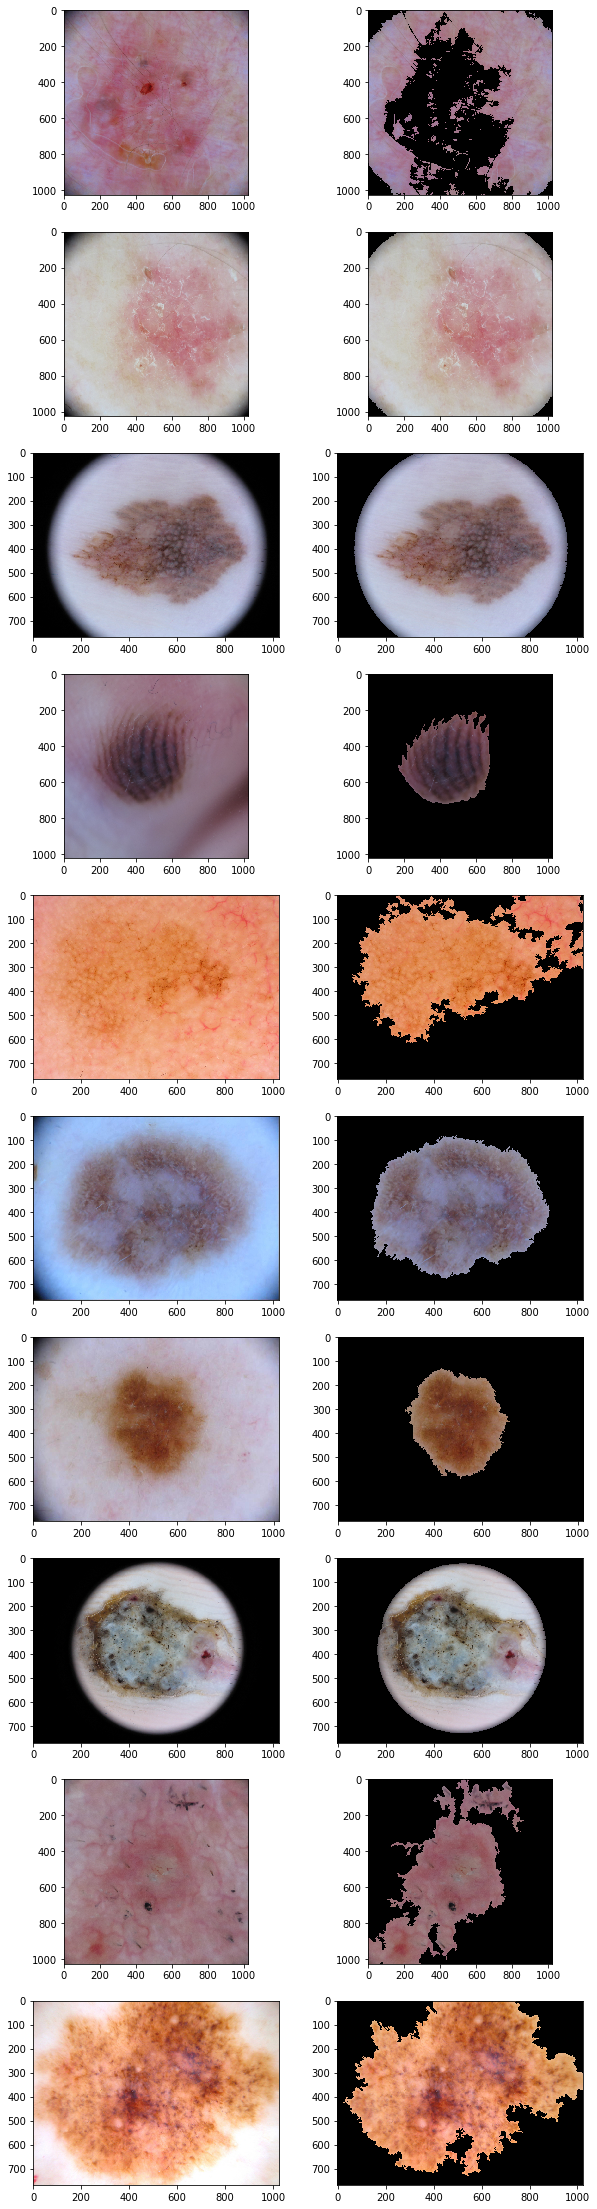

In [68]:
plt.figure(figsize=(10,40))
i = 0
for img in imgs[:10]:
    plt.subplot(10,2,2*i + 1)
    plt.imshow(img)
    removed = get_segmentation(img.copy())
    plt.subplot(10,2,2*i + 2)
    plt.imshow(removed)
    i+=1






